# Tracker Accuracy Evaluation

In [1]:
import sys
sys.path.append('../')
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
import load_data_luigi as ld
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from motion.output_creator import OutputCreator
from network_configuration import *
from motion.multi_volume_tracker import FullMultiVolumeTracker, PredictionMultiVolumeTracker
from functools import reduce

Using /home/claus/tracking/data/train_1 for data files


In [3]:
def test_accuracies(tracker, events, samples=True, score_only=None):
    output_creator = OutputCreator(tracker.configuration, tracker.model)
    events_scores_no_exist = []
    events_scores_exist = []
    events.build()
    for event in events.requires():
        event.built = True
        if samples:
            scores_no_exist = output_creator.score_output(event, score_on_full_event=False, score_sequences=True, score_only=score_only)
            scores_exist = output_creator.score_output(event, score_on_full_event=False, score_sequences=True, existence_correction=True, score_only=score_only)
        else:
            scores_no_exist = output_creator.score_output(event, score_on_full_event=True, score_sequences=False, score_only=score_only)
            scores_exist = output_creator.score_output(event, score_on_full_event=True, score_sequences=False, existence_correction=True, score_only=score_only)
        events_scores_no_exist.append(scores_no_exist)
        events_scores_exist.append(scores_exist)
    
    if samples:
        events_scores_no_exist = reduce(lambda a,b: a+b, events_scores_no_exist)
        events_scores_exist = reduce(lambda a,b: a+b, events_scores_exist)
    
    return events_scores_no_exist, events_scores_exist

In [4]:
events = ld.RootRangeDetectorFiles(start_range=1432, end_range=1480)
events = ld.DerivedRangeDetectorFiles(create_from=events, derive_task=ld.CreateAngles)
events = ld.DerivedRangeDetectorFiles(create_from=events, derive_task=ld.CreateNormalized)
events.build()

DEBUG: Checking if DerivedRangeDetectorFiles(derive_task=<class 'load_data_luigi.CreateNormalized'>, create_from=DerivedRangeDetectorFiles(derive_task=<class 'load_data_luigi.CreateAngles'>, create_from=RootRangeDetectorFiles(start_range=1432, end_range=1480))) is complete
INFO: Informed scheduler that task   DerivedRangeDetectorFiles_DerivedRangeDete__class__load_dat_3798bb78d9   has status   DONE
INFO: Done scheduling tasks
INFO: Running Worker with 32 processes
DEBUG: Asking scheduler for work...
DEBUG: Done
DEBUG: There are no more tasks to run at this time
INFO: Worker Worker(salt=130493487, workers=32, host=luke, username=claus, pid=19904) was stopped. Shutting down Keep-Alive thread
INFO: 
===== Luigi Execution Summary =====

Scheduled 1 tasks of which:
* 1 complete ones were encountered:
    - 1 DerivedRangeDetectorFiles(...)

Did not run any tasks
This progress looks :) because there were no failed tasks or missing dependencies

===== Luigi Execution Summary =====



## Subset of 20 particles
### Milan Model

In [5]:
milan_model = FullMultiVolumeTracker(sampled_milan_config, do_load_full=True)

Creating model for volume Pixel.BARREL
Creating model for volume Pixel.POSITIVE_EC
Creating model for volume Pixel.NEGATIVE_EC
Creating model for volume ShortStrip.BARREL
Creating model for volume ShortStrip.POSITIVE_EC
Creating model for volume ShortStrip.NEGATIVE_EC
Creating model for volume LongStrip.BARREL
Creating model for volume LongStrip.POSITIVE_EC
Creating model for volume LongStrip.NEGATIVE_EC


In [6]:
events_scores_no_exist, events_scores_exist = test_accuracies(milan_model, events)

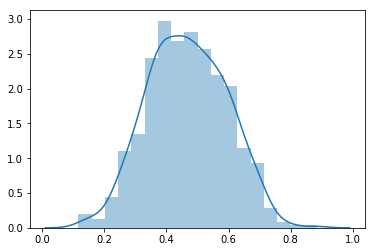

In [7]:
sns.distplot(events_scores_no_exist)

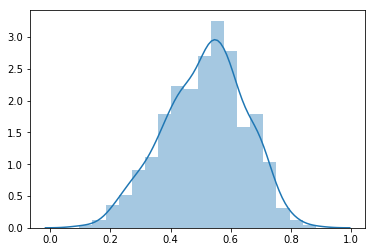

In [8]:
sns.distplot(events_scores_exist)

In [9]:
np.mean(events_scores_no_exist), np.mean(events_scores_exist)

(0.46729630171701664, 0.513430857251883)

The model similar to the one proposed by Milan et al. scores on average 0.467 without existence correction and 0.513 with existence correction.

### Milan Model without Existence Regularization

In [10]:
sampled_milan_no_exist_regul_model = FullMultiVolumeTracker(sampled_milan_no_exist_regul_config, do_load_full=True)

Creating model for volume Pixel.BARREL
Creating model for volume Pixel.POSITIVE_EC
Creating model for volume Pixel.NEGATIVE_EC
Creating model for volume ShortStrip.BARREL
Creating model for volume ShortStrip.POSITIVE_EC
Creating model for volume ShortStrip.NEGATIVE_EC
Creating model for volume LongStrip.BARREL
Creating model for volume LongStrip.POSITIVE_EC
Creating model for volume LongStrip.NEGATIVE_EC


In [11]:
events_scores_no_exist, events_scores_exist = test_accuracies(sampled_milan_no_exist_regul_model, events)

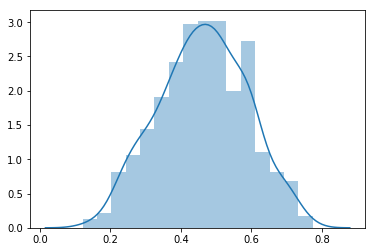

In [12]:
sns.distplot(events_scores_no_exist)

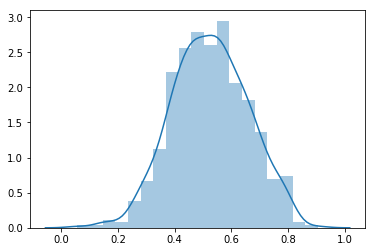

In [13]:
sns.distplot(events_scores_exist)

In [14]:
np.mean(events_scores_no_exist), np.mean(events_scores_exist)

(0.4626233040835367, 0.5251373433800361)

The Milan model without existence regularization scores 0.463 without existence correction and 0.525 with existence correction

### Milan Model with LSTM in Motion Model

In [15]:
sampled_milan_lstm_motion_no_exist_regul_model = FullMultiVolumeTracker(sampled_milan_lstm_motion_no_exist_regul_config, do_load_full=True)

Creating model for volume Pixel.BARREL
Creating model for volume Pixel.POSITIVE_EC
Creating model for volume Pixel.NEGATIVE_EC
Creating model for volume ShortStrip.BARREL
Creating model for volume ShortStrip.POSITIVE_EC
Creating model for volume ShortStrip.NEGATIVE_EC
Creating model for volume LongStrip.BARREL
Creating model for volume LongStrip.POSITIVE_EC
Creating model for volume LongStrip.NEGATIVE_EC


In [16]:
events_scores_no_exist, events_scores_exist = test_accuracies(sampled_milan_lstm_motion_no_exist_regul_model, events)

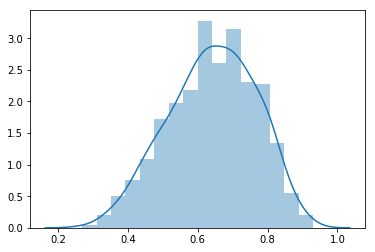

In [17]:
sns.distplot(events_scores_no_exist)

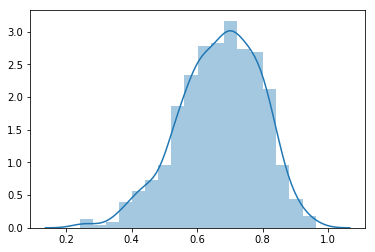

In [18]:
sns.distplot(events_scores_exist)

In [19]:
np.mean(events_scores_no_exist), np.mean(events_scores_exist)

(0.6417120513295713, 0.6694777230675742)

The Milan model using an LSTM in the motion model scores 0.642 without existence correction and 0.669 with existence correction.

### Model with LSTM Motion Model and Dense Association Model

In [20]:
sampled_dense_assoc_lstm_motion_model = FullMultiVolumeTracker(sampled_dense_assoc_lstm_motion_config, do_load_full=True)

Creating model for volume Pixel.BARREL
Creating model for volume Pixel.POSITIVE_EC
Creating model for volume Pixel.NEGATIVE_EC
Creating model for volume ShortStrip.BARREL
Creating model for volume ShortStrip.POSITIVE_EC
Creating model for volume ShortStrip.NEGATIVE_EC
Creating model for volume LongStrip.BARREL
Creating model for volume LongStrip.POSITIVE_EC
Creating model for volume LongStrip.NEGATIVE_EC


In [21]:
events_scores_no_exist, events_scores_exist = test_accuracies(sampled_dense_assoc_lstm_motion_model, events)

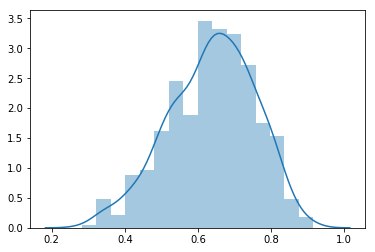

In [22]:
sns.distplot(events_scores_no_exist)

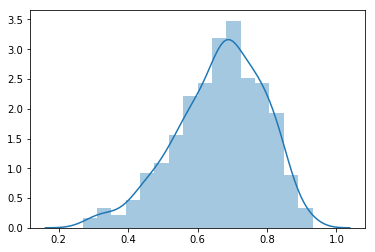

In [23]:
sns.distplot(events_scores_exist)

In [24]:
np.mean(events_scores_no_exist), np.mean(events_scores_exist)

(0.6377773683772141, 0.6639065675628681)

The model with LSTM in the motion model and dense association scores 0.638 without existence correction and 0.664 with existence correction

### Model with LSTM Motion Model, Dense Association Model and wihtout Existence Weighting

In [5]:
sampled_dense_assoc_lstm_motion_no_exist_weighting_model = FullMultiVolumeTracker(sampled_dense_assoc_lstm_motion_no_exist_weighting_config, do_load_full=True)

Creating model for volume Pixel.BARREL
Creating model for volume Pixel.POSITIVE_EC
Creating model for volume Pixel.NEGATIVE_EC
Creating model for volume ShortStrip.BARREL
Creating model for volume ShortStrip.POSITIVE_EC
Creating model for volume ShortStrip.NEGATIVE_EC
Creating model for volume LongStrip.BARREL
Creating model for volume LongStrip.POSITIVE_EC
Creating model for volume LongStrip.NEGATIVE_EC


In [6]:
events_scores_no_exist, events_scores_exist = test_accuracies(sampled_dense_assoc_lstm_motion_no_exist_weighting_model, events)

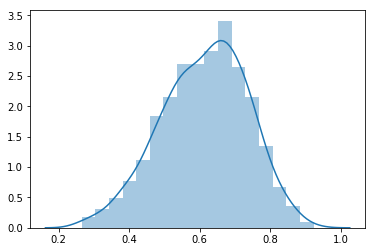

In [7]:
sns.distplot(events_scores_no_exist)

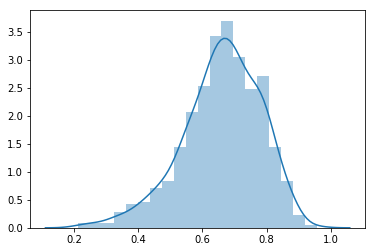

In [8]:
sns.distplot(events_scores_exist)

In [9]:
np.mean(events_scores_no_exist), np.mean(events_scores_exist)

(0.6132593013678957, 0.6597049499589799)

The model with LSTM motion model, dense association model and wihtout existence weighting scores 0.613 without existence correction 0.660 with existence correction.

# 200 particles

In [10]:
model_200 = FullMultiVolumeTracker(sampled_row_col_config_200, do_load_full=True)

Creating model for volume Pixel.BARREL
Creating model for volume Pixel.POSITIVE_EC
Creating model for volume Pixel.NEGATIVE_EC
Creating model for volume ShortStrip.BARREL
Creating model for volume ShortStrip.POSITIVE_EC
Creating model for volume ShortStrip.NEGATIVE_EC
Creating model for volume LongStrip.BARREL
Creating model for volume LongStrip.POSITIVE_EC
Creating model for volume LongStrip.NEGATIVE_EC


In [11]:
events_scores_no_exist, events_scores_exist = test_accuracies(model_200, events)

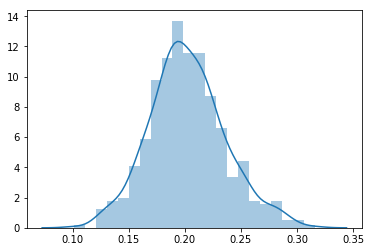

In [12]:
sns.distplot(events_scores_no_exist)

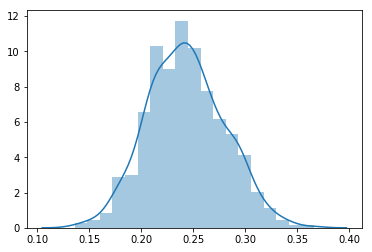

In [13]:
sns.distplot(events_scores_exist)

In [14]:
np.mean(events_scores_no_exist), np.mean(events_scores_exist)

(0.20240180725806553, 0.24276368829340284)

The model with LSTM motion model, dense association model and wihtout existence weighting scores 0.202 without existence correction and 0.243 with existence correction on a sample of 200 particles.

# Full Event

In [15]:
events = ld.RootRangeDetectorFiles(start_range=1432, end_range=1437)
events = ld.DerivedRangeDetectorFiles(create_from=events, derive_task=ld.CreateAngles)
events = ld.DerivedRangeDetectorFiles(create_from=events, derive_task=ld.create_sequences(14))
events = ld.DerivedRangeDetectorFiles(create_from=events,
                                                  derive_task=ld.create_phi_sequences(4))
events = ld.DerivedRangeDetectorFiles(create_from=events, derive_task=ld.CreateNormalized)
events.build()

DEBUG: Checking if DerivedRangeDetectorFiles(derive_task=<class 'load_data_luigi.CreateNormalized'>, create_from=DerivedRangeDetectorFiles(derive_task=<class 'load_data_luigi.create_phi_sequences.<locals>.CreatePhiSequences'>, create_from=DerivedRangeDetectorFiles(derive_task=<class 'load_data_luigi.create_sequences.<locals>.CreateSequences'>, create_from=DerivedRangeDetectorFiles(derive_task=<class 'load_data_luigi.CreateAngles'>, create_from=RootRangeDetectorFiles(start_range=1432, end_range=1437))))) is complete
INFO: Informed scheduler that task   DerivedRangeDetectorFiles_DerivedRangeDete__class__load_dat_2c16c63cd3   has status   DONE
INFO: Done scheduling tasks
INFO: Running Worker with 32 processes
DEBUG: Asking scheduler for work...
DEBUG: Done
DEBUG: There are no more tasks to run at this time
INFO: Worker Worker(salt=468346526, workers=32, host=luke, username=claus, pid=19904) was stopped. Shutting down Keep-Alive thread
INFO: 
===== Luigi Execution Summary =====

Scheduled 

In [16]:
model_full = FullMultiVolumeTracker(row_col_config, do_load_full=True)

Creating model for volume Pixel.BARREL
Creating model for volume Pixel.POSITIVE_EC
Creating model for volume Pixel.NEGATIVE_EC
Creating model for volume ShortStrip.BARREL
Creating model for volume ShortStrip.POSITIVE_EC
Creating model for volume ShortStrip.NEGATIVE_EC
Creating model for volume LongStrip.BARREL
Creating model for volume LongStrip.POSITIVE_EC
Creating model for volume LongStrip.NEGATIVE_EC


In [17]:
events_scores_no_exist, events_scores_exist = test_accuracies(model_full, events, samples=False)

In [18]:
np.mean(events_scores_no_exist), np.mean(events_scores_exist)

(0.00010434091612970746, 5.797893926080182e-05)

The scores for the model with LSTM motion model, dense association model and wihtout existence weighting unfortunately are not significantly above 0.0 for theta/phi bucketing.

## Theoretical accuracy

In [19]:
model_predict = PredictionMultiVolumeTracker(row_col_config)

Creating model for volume Pixel.BARREL
Creating model for volume Pixel.POSITIVE_EC
Creating model for volume Pixel.NEGATIVE_EC
Creating model for volume ShortStrip.BARREL
Creating model for volume ShortStrip.POSITIVE_EC
Creating model for volume ShortStrip.NEGATIVE_EC
Creating model for volume LongStrip.BARREL
Creating model for volume LongStrip.POSITIVE_EC
Creating model for volume LongStrip.NEGATIVE_EC


In [20]:
events_scores_no_exist, events_scores_exist = test_accuracies(model_predict, events, samples=False)

In [21]:
np.mean(events_scores_no_exist), np.mean(events_scores_exist)

(0.8160792257940486, 0.8161110596680053)

In theory, a perfect model would be able to score 0.816 using the phi/theta bucketing approach.

# Full tracks vs partial tracks

In [22]:
events = ld.RootRangeDetectorFiles(start_range=1432, end_range=1480)
events = ld.DerivedRangeDetectorFiles(create_from=events, derive_task=ld.CreateAngles)
events = ld.DerivedRangeDetectorFiles(create_from=events, derive_task=ld.CreateNormalized)

In [23]:
sampled_dense_assoc_lstm_motion_no_exist_weighting_model = FullMultiVolumeTracker(sampled_dense_assoc_lstm_motion_no_exist_weighting_config, do_load_full=True)

Creating model for volume Pixel.BARREL
Creating model for volume Pixel.POSITIVE_EC
Creating model for volume Pixel.NEGATIVE_EC
Creating model for volume ShortStrip.BARREL
Creating model for volume ShortStrip.POSITIVE_EC
Creating model for volume ShortStrip.NEGATIVE_EC
Creating model for volume LongStrip.BARREL
Creating model for volume LongStrip.POSITIVE_EC
Creating model for volume LongStrip.NEGATIVE_EC


## Full tracks

In [24]:
events_scores_no_exist, events_scores_exist = test_accuracies(sampled_dense_assoc_lstm_motion_no_exist_weighting_model, events, score_only='full')

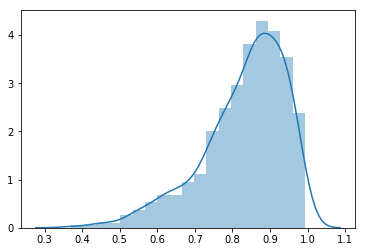

In [25]:
sns.distplot(events_scores_no_exist)

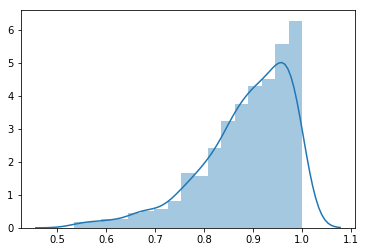

In [26]:
sns.distplot(events_scores_exist)

In [27]:
np.mean(events_scores_no_exist), np.mean(events_scores_exist)

(0.8309780616292551, 0.8853870430335152)

When only considering tracks starting at the center of the detector and a particle count of 20, the model would be able to score an accuracy of 0.885.

## Partial Tracks

In [28]:
events_scores_no_exist, events_scores_exist = test_accuracies(sampled_dense_assoc_lstm_motion_no_exist_weighting_model, events, score_only='detected')

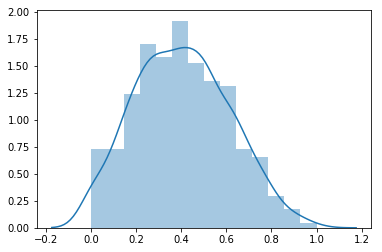

In [29]:
sns.distplot(events_scores_no_exist)

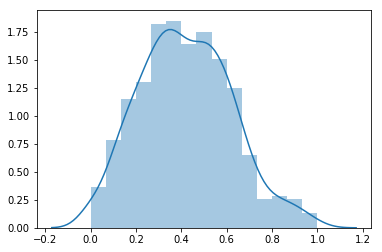

In [30]:
sns.distplot(events_scores_exist)

In [31]:
np.mean(events_scores_no_exist), np.mean(events_scores_exist)

(0.4026080837269441, 0.41936243565648834)

When only considering tracks that do not start from the center of the detector, the score is only at 0.420.